# 目的

In [1]:
DAX30指数有三十个股票，听起来不多的样子，其实还是挺多的，我们很有必要对其进行主成分分析，然后找出最重要的几个股票。想必PCA的原理大家应该都是知道，说白了就是在一个回归中找到影响最大的那几个，当然，数学原理就涉及矩阵分解，什么SVD呀。

先上点代码

SyntaxError: invalid character in identifier (<ipython-input-1-7a25e7baee37>, line 1)

# test fix_yahoo_finance

In [2]:
import fix_yahoo_finance as yf
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as web
yf.pdr_override()

start = dt.datetime(2016, 6, 14)
end = dt.datetime(2017, 6, 14)
 
df = web.get_data_yahoo(['2330.TW'], start, end)

df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-14,161.0,163.0,161.0,162.0,145.553299,27509000
2016-06-15,162.0,163.0,161.0,163.0,146.451767,29270000
2016-06-16,161.5,162.5,159.5,160.5,144.205582,24408000
2016-06-17,162.5,164.5,162.0,163.0,146.451767,30633000
2016-06-20,164.5,165.0,163.0,163.0,146.451767,24911000
2016-06-21,164.0,165.5,163.5,165.5,148.697968,27970000
2016-06-22,164.5,166.0,163.5,166.0,149.147202,30359000
2016-06-23,165.5,166.0,164.0,164.0,147.350250,22494000
2016-06-24,164.0,164.0,154.5,159.0,142.857849,86547000


In [3]:
df = web.get_data_yahoo(['2330.TW'], start, end)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-14,161.0,163.0,161.0,162.0,145.553299,27509000
2016-06-15,162.0,163.0,161.0,163.0,146.451767,29270000
2016-06-16,161.5,162.5,159.5,160.5,144.205582,24408000
2016-06-17,162.5,164.5,162.0,163.0,146.451767,30633000
2016-06-20,164.5,165.0,163.0,163.0,146.451767,24911000
2016-06-21,164.0,165.5,163.5,165.5,148.697968,27970000
2016-06-22,164.5,166.0,163.5,166.0,149.147202,30359000
2016-06-23,165.5,166.0,164.0,164.0,147.350250,22494000
2016-06-24,164.0,164.0,154.5,159.0,142.857849,86547000


# import PCA 相觀模塊

In [4]:
import numpy as np
np.random.seed(1000)

import scipy.stats as scs
import statsmodels.api as sm
#导入机器学习的PCA包
from sklearn.decomposition import KernelPCA

In [5]:

#DAX30指数各个股票的代码以及德国30指数代码，共31个数据列
symbols = ['ADS.DE','ALV.DE','BAS.DE','BAYN.DE','BEI.DE','BMW.DE','CBK.DE','CON.DE','DAI.DE',
            'DB1.DE','DBK.DE','DPW.DE','DTE.DE','EOAN.DE','FME.DE','FRE.DE','HEI.DE','HEN3.DE',
            'IFX.DE','LHA.DE','LIN.DE','LXS.DE','MRK.DE','MUV2.DE','RWE.DE','SAP.DE','SDF.DE',
            'SIE.DE','TKA.DE','VOW3.DE','^GDAXI']

data = {}
#获取数据
for sym in symbols:
    data[sym] = web.get_data_yahoo([sym], start, end)['Close']
    

data

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

{'ADS.DE': Date
 2016-06-13    117.500000
 2016-06-14    115.050003
 2016-06-15    115.300003
 2016-06-16    115.500000
 2016-06-17    117.199997
 2016-06-20    121.949997
 2016-06-21    123.000000
 2016-06-22    123.800003
 2016-06-23    123.500000
 2016-06-24    119.849998
 2016-06-27    119.750000
 2016-06-28    122.650002
 2016-06-29    125.800003
 2016-06-30    128.449997
 2016-07-01    128.199997
 2016-07-04    127.400002
 2016-07-05    125.550003
 2016-07-06    128.000000
 2016-07-07    126.550003
 2016-07-08    126.900002
 2016-07-11    129.850006
 2016-07-12    130.949997
 2016-07-13    131.250000
 2016-07-14    129.800003
 2016-07-15    131.550003
 2016-07-18    131.149994
 2016-07-19    132.649994
 2016-07-20    136.600006
 2016-07-21    138.250000
 2016-07-22    137.000000
                  ...    
 2017-05-03    182.149994
 2017-05-04    183.800003
 2017-05-05    184.149994
 2017-05-08    182.399994
 2017-05-09    183.850006
 2017-05-10    180.600006
 2017-05-11    179.000

In [6]:

data_df = pd.concat(data,axis=1)

#丢弃缺失数据
data_df.dropna(inplace=True)

data_df

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-13,117.500000,130.850006,66.870003,86.659401,78.849998,69.339996,6.520,179.800003,56.369999,74.639999,...,40.450001,87.849998,151.649994,12.485000,68.190002,20.450001,91.550003,17.760000,121.800003,9657.440430
2016-06-14,115.050003,128.550003,66.459999,85.773697,78.019997,67.599998,6.403,178.899994,55.049999,73.680000,...,40.075001,86.849998,149.399994,11.845000,67.349998,19.850000,90.169998,17.400000,119.099998,9519.200195
2016-06-15,115.300003,129.350006,67.980003,86.698799,78.120003,68.559998,6.410,180.800003,55.509998,72.800003,...,40.040001,86.480003,150.300003,12.095000,67.680000,19.945000,91.769997,17.735001,120.150002,9606.709961
2016-06-16,115.500000,129.350006,67.839996,86.374001,78.110001,68.300003,6.260,179.649994,55.310001,72.250000,...,39.255001,85.339996,149.149994,11.950000,67.330002,19.825001,90.889999,17.860001,117.550003,9550.469727
2016-06-17,117.199997,130.350006,67.510002,86.679100,77.330002,68.970001,6.533,181.750000,55.869999,74.190002,...,39.915001,87.010002,150.449997,12.430000,67.769997,20.230000,92.290001,18.504999,118.750000,9631.360352
2016-06-20,121.949997,135.550003,69.709999,88.981903,79.730003,72.239998,6.712,189.949997,58.349998,77.779999,...,41.849998,89.110001,155.199997,13.125000,69.599998,21.010000,94.949997,19.040001,124.750000,9962.019531
2016-06-21,123.000000,136.449997,69.809998,90.280899,80.529999,72.639999,6.802,189.949997,58.660000,79.260002,...,41.595001,89.180000,156.449997,13.155000,70.269997,21.000000,95.760002,18.865000,123.599998,10015.540039
2016-06-22,123.800003,138.199997,70.519997,90.379303,80.639999,72.470001,6.839,191.250000,59.000000,80.320000,...,41.794998,89.739998,158.000000,13.385000,70.089996,20.995001,96.099998,18.930000,123.099998,10071.059570
2016-06-23,123.500000,141.500000,71.870003,91.688103,81.309998,74.250000,7.127,196.800003,59.990002,81.650002,...,42.799999,90.089996,160.800003,13.795000,71.110001,22.235001,97.760002,19.889999,126.949997,10257.030273


In [7]:
#将指数数据单独拿出来，采用pop在获取的时候已经从原来的地方删除了这一列数据了
dax = data_df.pop('^GDAXI')
dax

Date
2016-06-13     9657.440430
2016-06-14     9519.200195
2016-06-15     9606.709961
2016-06-16     9550.469727
2016-06-17     9631.360352
2016-06-20     9962.019531
2016-06-21    10015.540039
2016-06-22    10071.059570
2016-06-23    10257.030273
2016-06-24     9557.160156
2016-06-27     9268.660156
2016-06-28     9447.280273
2016-06-29     9612.269531
2016-06-30     9680.089844
2016-07-01     9776.120117
2016-07-04     9709.089844
2016-07-05     9532.610352
2016-07-06     9373.259766
2016-07-07     9418.780273
2016-07-08     9629.660156
2016-07-11     9833.410156
2016-07-12     9964.070313
2016-07-13     9930.709961
2016-07-14    10068.299805
2016-07-15    10066.900391
2016-07-18    10063.129883
2016-07-19     9981.240234
2016-07-20    10142.009766
2016-07-21    10156.209961
2016-07-22    10147.459961
                  ...     
2017-05-02    12507.900391
2017-05-03    12527.839844
2017-05-04    12647.780273
2017-05-05    12716.889648
2017-05-08    12694.549805
2017-05-09    12749.120

# 标准化

做PCA前，我们要对数据做标准化

In [8]:
scale_data_df = (data_df - data_df.mean())/data_df.std()
scale_data_df


scale_dax_df = (dax - dax.mean())/dax.std()
scale_dax_df

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-13,-2.109351,-1.164159,-1.788592,-1.261940,-1.100917,-1.941308,-0.551803,-0.680786,-1.872921,-0.452294,...,-1.940189,-1.764897,-2.008753,-1.664786,-0.950106,-1.935259,-0.071403,-1.745066,-2.463490,-0.752270
2016-06-14,-2.253826,-1.298530,-1.838675,-1.361139,-1.266432,-2.224653,-0.645160,-0.761676,-2.153255,-0.584882,...,-2.006665,-1.804275,-2.184430,-1.865392,-1.308258,-2.046830,-0.346730,-1.859233,-2.680577,-0.992141
2016-06-15,-2.239084,-1.251792,-1.653005,-1.257528,-1.246490,-2.068324,-0.639574,-0.590909,-2.055563,-0.706421,...,-1.912816,-1.807951,-2.249430,-1.785149,-1.168355,-2.002999,-0.303137,-1.726866,-2.478565,-0.898858
2016-06-16,-2.227290,-1.251792,-1.670107,-1.293905,-1.248484,-2.110663,-0.759263,-0.694268,-2.098037,-0.782384,...,-2.041859,-1.890383,-2.449703,-1.887681,-1.249499,-2.049486,-0.358202,-1.799668,-2.403187,-1.129845
2016-06-17,-2.127042,-1.193370,-1.710416,-1.259734,-1.404028,-2.001559,-0.541430,-0.505525,-1.979108,-0.514444,...,-2.034037,-1.821077,-2.156321,-1.771775,-0.980885,-1.991045,-0.172357,-1.683846,-2.014241,-1.023236
2016-06-20,-1.846938,-0.889573,-1.441684,-1.001820,-0.925430,-1.469065,-0.398601,0.231469,-1.452422,-0.018618,...,-1.830698,-1.617883,-1.787399,-1.348274,-0.591954,-1.747981,0.185568,-1.463786,-1.691624,-0.490188
2016-06-21,-1.785020,-0.836993,-1.429469,-0.856332,-0.765898,-1.403928,-0.326788,0.231469,-1.386585,0.185789,...,-1.772042,-1.644660,-1.775102,-1.236826,-0.575166,-1.658990,0.180979,-1.396775,-1.797153,-0.592356
2016-06-22,-1.737844,-0.734754,-1.342742,-0.845311,-0.743962,-1.431611,-0.297264,0.348310,-1.314378,0.332189,...,-1.807236,-1.623659,-1.676723,-1.098631,-0.446455,-1.682898,0.178685,-1.368648,-1.757957,-0.636777
2016-06-23,-1.755535,-0.541960,-1.177837,-0.698725,-0.610354,-1.141752,-0.067462,0.847130,-1.104128,0.515880,...,-1.451391,-1.518123,-1.615236,-0.848988,-0.217014,-1.547419,0.747693,-1.231317,-1.179058,-0.294738


Date
2016-06-13   -1.668993
2016-06-14   -1.818409
2016-06-15   -1.723825
2016-06-16   -1.784612
2016-06-17   -1.697182
2016-06-20   -1.339792
2016-06-21   -1.281945
2016-06-22   -1.221937
2016-06-23   -1.020932
2016-06-24   -1.777381
2016-06-27   -2.089203
2016-06-28   -1.896143
2016-06-29   -1.717816
2016-06-30   -1.644513
2016-07-01   -1.540720
2016-07-04   -1.613169
2016-07-05   -1.803915
2016-07-06   -1.976148
2016-07-07   -1.926947
2016-07-08   -1.699020
2016-07-11   -1.478798
2016-07-12   -1.337575
2016-07-13   -1.373633
2016-07-14   -1.224920
2016-07-15   -1.226432
2016-07-18   -1.230508
2016-07-19   -1.319017
2016-07-20   -1.145251
2016-07-21   -1.129903
2016-07-22   -1.139360
                ...   
2017-05-02    1.411900
2017-05-03    1.433452
2017-05-04    1.563088
2017-05-05    1.637784
2017-05-08    1.613639
2017-05-09    1.672620
2017-05-10    1.681634
2017-05-11    1.631483
2017-05-12    1.695632
2017-05-15    1.735223
2017-05-16    1.732510
2017-05-17    1.545611
2017-0

# PCA

In [9]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA().fit(scale_data_df.T)

In [10]:
pca.lambdas_.shape

(30,)

In [11]:
get_we = lambda x:x/x.sum()
get_we(pca.lambdas_)[:10]

array([0.48349886, 0.16901951, 0.1086243 , 0.06327283, 0.04316681,
       0.02705147, 0.02115172, 0.0157823 , 0.01051499, 0.00875285])

# PCA_1

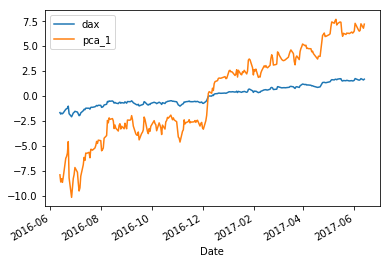

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pca_1 = KernelPCA(n_components = 1).fit_transform(scale_data_df)

pd.DataFrame(
    {
        'dax':scale_dax_df,
         'pca_1':pca_1.ravel()
    }
).plot()

# PCA_5

In [13]:
pca_5 = KernelPCA(n_components = 5).fit(scale_data_df)

weights = get_we(pca_5.lambdas_)

pca_5_data = np.dot(pca_5.transform(scale_data_df),weights)

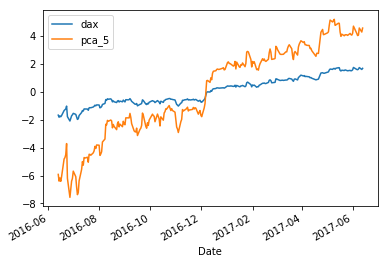

In [16]:
pd.DataFrame(
    {
        'dax':scale_dax_df,
         'pca_5':pca_5_data
    }
).plot()

<Figure size 576x288 with 0 Axes>

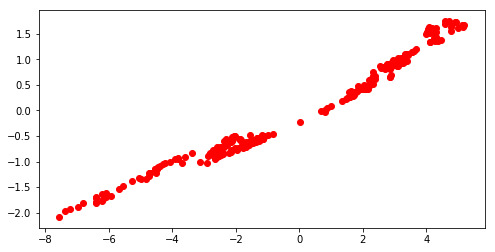

In [18]:
plt.figure(figsize = (8,4))

plt.scatter(
    pca_5_data,
    scale_dax_df,
    color = 'r'
)


# 參考

http://www.magedu.com/71455.html


# 內容

源自參考來源的程式有許多問題(以下為參考來源的程式)

經過測試，修正

發現，每年的情形不一定

如:2017/6/14 - 2018/6/14，呈現負相關

而2016/6/14 - 2017/6/14，呈現正相關



```py

import pandas as pd
import pandas.io.data as web
import numpy as np
np.random.seed(1000)

import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA#导入机器学习的PCA包
symbols = [‘ADS.DE’,‘ALV.DE’,‘BAS.DE’,‘BAYN.DE’,‘BEI.DE’,‘BMW.DE’,‘CBK.DE’,‘CON.DE’,‘DAI.DE’,
            ‘DB1.DE’,‘DBK.DE’,‘DPW.DE’,‘DTE.DE’,‘EOAN.DE’,‘FME.DE’,‘FRE.DE’,‘HEI.DE’,‘HEN3.DE’,
            ‘IFX.DE’,‘LHA.DE’,‘LIN.DE’,‘LXS.DE’,‘MRK.DE’,‘MUV2.DE’,‘RWE.DE’,‘SAP.DE’,‘SDF.DE’,
            ‘SIE.DE’,‘TKA.DE’,‘VOW3.DE’,‘^GDAXI’]#DAX30指数各个股票的代码以及德国30指数代码，共31个数据列
data = pd.DataFrame()
for sym in symbols:#获取数据
    data[sym] = web.DataReader(sym,data_source = ‘yahoo’)[‘Close’]
data = data.dropna()#丢弃缺失数据
dax = pd.DataFrame(data.pop(‘^GDAXI’))#将指数数据单独拿出来，采用pop在获取的时候已经从原来的地方删除了这一列数据了
scale_function = lambda x:(x-x.mean())/x.std()
pca = KernelPCA().fit(data.apply(scale_function))#这里用到了apply函数。做PCA前，我们要对数据做标准化
get_we = lambda x:x/x.sum()
print get_we(pca.lambdas_)[:10]
这样，你就可以看到前十个股票对DAX30指数的贡献量了。

pca = KernelPCA(n_components = 1).fit(data.apply(scale_function))
dax[‘PCA_1’] =pca.transform(data)
dax.apply(scale_function).plot(figsize = (8,4))
pca = KernelPCA(n_components = 5).fit(data.apply(scale_function))
weights = get_we(pca.lambdas_)
dax[‘PCA_5’] =np.dot(pca.transform(data),weights)
使用Python - PCA分析进行金融数据分析

这里，我们采用只用第一个成分去拟合以及前五个成分去拟合，发现效果好的出奇。这样我们就做到了降维的工作了。我们再来展开看一下PCA的效果。

plt.figure(figsize = (8,4))
plt.scatter(dax[‘PCA_5’],dax[‘^GDAXI’],color = ‘r’)
这里，我们把PCA后的值与原始值进行散点图的绘制

```